In [1]:
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
from functools import reduce
sns.set()
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 100)


In [77]:
def pull_year(filename):
    return int(pd.read_excel(filename, header=0).columns[0].split('-')[0])
    
def grab_sheet(filename):
    df = pd.read_excel(filename, header=1, index_col=0)
    df.index = [i.capitalize().replace('-',' ').strip() for i in df.index]
    df = df.replace({'\$': '', ',': ''}, regex=True).transpose()
    return df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

salary_list = os.listdir("salaries")
salary_dict = {pull_year("salaries/"+m): grab_sheet("salaries/"+m) for m in salary_list if m.endswith("xlsx")}

In [78]:
df = pd.Panel(salary_dict)
df[2015].columns

Index(['Abington', 'Acton', 'Acton boxborough', 'Acushnet', 'Adams cheshire',
       'Agawam', 'Amesbury', 'Amherst', 'Amherst pelham', 'Andover',
       ...
       'Williamsburg', 'Williamstown', 'Wilmington', 'Winchendon',
       'Winchester', 'Winthrop', 'Woburn', 'Worcester', 'Worthington',
       'Wrentham'],
      dtype='object', length=379)

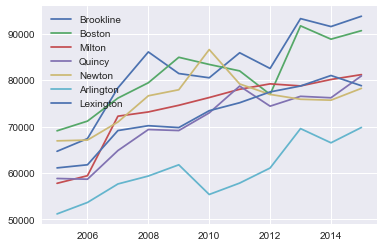

In [55]:
towns = ["Brookline", "Boston", "Milton", "Quincy",  "Newton", "Arlington", "Lexington"]
df.loc[:,'Average Salary', towns].transpose().plot()

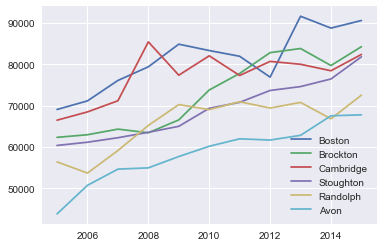

In [56]:
towns = ["Boston", "Brockton", "Cambridge", "Stoughton",  "Randolph", "Avon"]
df.loc[:,'Average Salary', towns].transpose().plot()

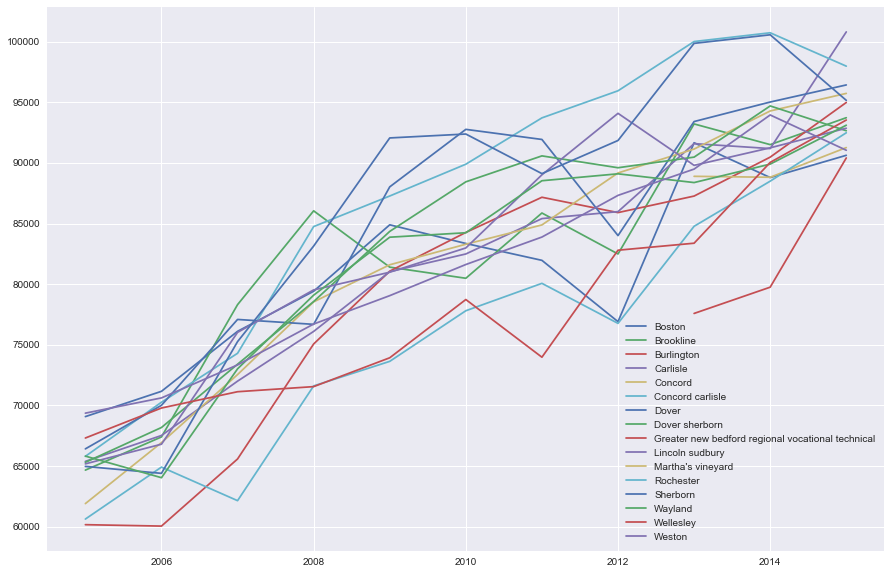

In [85]:
sals = salary_dict[2015].transpose()
townsover90 = sals[sals['Average Salary'] > 90000].index
df.loc[:,'Average Salary', list(townsover90)].transpose().plot(figsize=(15,10))